In [1]:
from examples.datasets.vectorized_xor import template, dataset

from neuralogic.utils.visualize import draw_model
from neuralogic.nn import get_evaluator
from neuralogic.core import Backend


neuralogic_evaluator = get_evaluator(Backend.JAVA, template)


### Initialized with random weights 

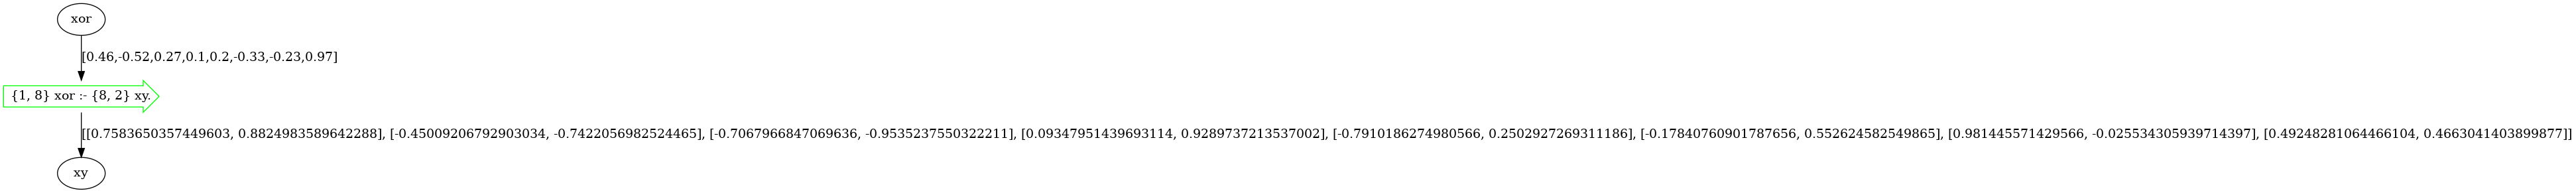

In [3]:
draw_model(neuralogic_evaluator.model, img_type="png")

In [5]:

# either set dataset or use `train(dataset)` and `test(dataset)`
neuralogic_evaluator.set_dataset(dataset)


printouts = 10

for epoch, (total_loss, seen_instances) in enumerate(neuralogic_evaluator.train()):
    if epoch % printouts == 0:
        print(
            f"Epoch {epoch}, total loss: {total_loss}, instances: {seen_instances}, average loss {total_loss / seen_instances}"
        )

for label, predicted in neuralogic_evaluator.test():
    print(f"Label: {label}, predicted: {predicted}")


Epoch 0, total loss: 1.0212467084868868, instances: 4, average loss 0.2553116771217217
Epoch 10, total loss: 0.9287394354955822, instances: 4, average loss 0.23218485887389556
Epoch 20, total loss: 0.8904177909697113, instances: 4, average loss 0.22260444774242782
Epoch 30, total loss: 0.840842427238273, instances: 4, average loss 0.21021060680956824
Epoch 40, total loss: 0.7668416958007093, instances: 4, average loss 0.19171042395017732
Epoch 50, total loss: 0.6589097979263965, instances: 4, average loss 0.16472744948159912
Epoch 60, total loss: 0.5231151683441413, instances: 4, average loss 0.13077879208603532
Epoch 70, total loss: 0.3856551623138247, instances: 4, average loss 0.09641379057845617
Epoch 80, total loss: 0.27349160391640526, instances: 4, average loss 0.06837290097910131
Epoch 90, total loss: 0.19455578807454443, instances: 4, average loss 0.04863894701863611
Epoch 100, total loss: 0.14234455386521977, instances: 4, average loss 0.03558613846630494
Epoch 110, total los

Epoch 2290, total loss: 0.000784617905765802, instances: 4, average loss 0.0001961544764414505
Epoch 2300, total loss: 0.0007806053949104928, instances: 4, average loss 0.0001951513487276232
Epoch 2310, total loss: 0.0007766318930390408, instances: 4, average loss 0.0001941579732597602
Epoch 2320, total loss: 0.0007726968447012496, instances: 4, average loss 0.0001931742111753124
Epoch 2330, total loss: 0.0007687997048294699, instances: 4, average loss 0.00019219992620736747
Epoch 2340, total loss: 0.0007649399384989073, instances: 4, average loss 0.00019123498462472684
Epoch 2350, total loss: 0.0007611170206943812, instances: 4, average loss 0.0001902792551735953
Epoch 2360, total loss: 0.0007573304360836157, instances: 4, average loss 0.00018933260902090392
Epoch 2370, total loss: 0.0007535796787965503, instances: 4, average loss 0.00018839491969913758
Epoch 2380, total loss: 0.000749864252210701, instances: 4, average loss 0.00018746606305267526
Epoch 2390, total loss: 0.00074618366

### Learned model

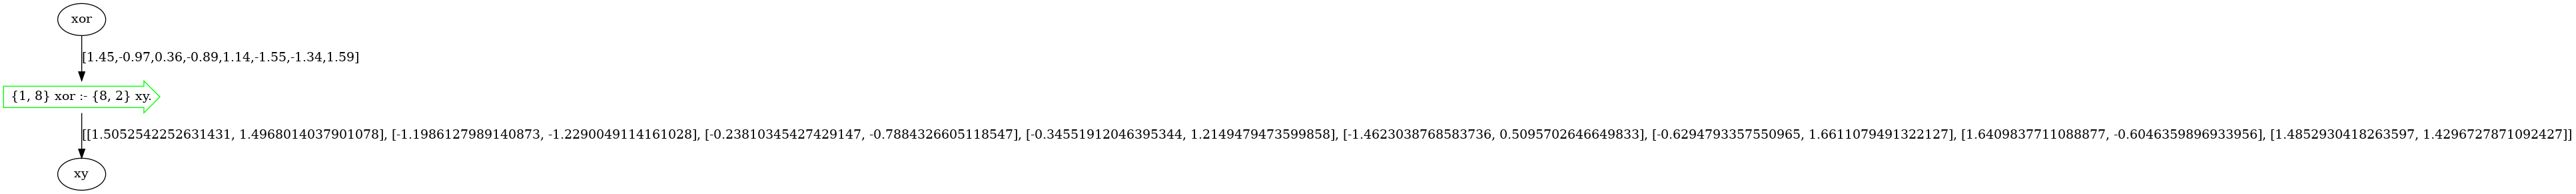

In [6]:
draw_model(neuralogic_evaluator.model)

### Loading from files will return `Problem` instance

In [8]:
from neuralogic.utils.data import XOR
from neuralogic.core.settings import Settings

template, dataset = XOR(Settings())

### Switching datasets

In [11]:
from neuralogic.core import Atom, Template
from neuralogic.core.settings import Settings, Optimizer
from neuralogic.utils.data import Dataset

settings = Settings(optimizer=Optimizer.SGD, epochs=200)


template = None
dataset = Dataset()


with Template(settings).context() as template:
    template.add_rule(Atom.xor[1, 8] <= Atom.xy[8, 2])  # Add template rule

    
evaluator = get_evaluator(Backend.JAVA, template)  # Evaluator with empty dataset


with template.context():
    dataset.set_examples(
        [
            Atom.xor[0] <= Atom.xy[[0, 0]],
            Atom.xor[1] <= Atom.xy[[0, 1]],
        ]
    )

evaluator.train(dataset, generator=False)

for label, predicted in evaluator.test(dataset):
    print(f"Label: {label}, predicted: {predicted}")


print("Switching to different dataset")
    
with template.context():
    dataset.set_examples(
        [
            Atom.xor[1] <= Atom.xy[[1, 0]],
            Atom.xor[0] <= Atom.xy[[1, 1]],
        ]
    )

    
evaluator.train(dataset, generator=False)

for label, predicted in evaluator.test(dataset):
    print(f"Label: {label}, predicted: {predicted}")

Label: 0.0, predicted: 0.0
Label: 1.0, predicted: 0.9574761912117474
Switching to different dataset
Label: 1.0, predicted: 0.9252397466506981
Label: 0.0, predicted: 0.0022548662212493195


In [12]:
with template.context():
    dataset.set_examples(
        [
            Atom.xor[0] <= Atom.xy[[0, 0]],
            Atom.xor[1] <= Atom.xy[[0, 1]],
            Atom.xor[1] <= Atom.xy[[1, 0]],
            Atom.xor[0] <= Atom.xy[[1, 1]],
        ]
    )

for label, predicted in evaluator.test(dataset):
    print(f"Label: {label}, predicted: {predicted}")


Label: 0.0, predicted: 0.0
Label: 1.0, predicted: -0.7178464506048822
Label: 1.0, predicted: 0.9252397466506981
Label: 0.0, predicted: 0.0022548662212493195
